#### Importing Libraries

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

##### Loading the Dataset

In [67]:
df_train=pd.read_json('/Users/katyainiraj/Desktop/Capstone/dataset squad/train-v1.1.json')
df_test=pd.read_json('/Users/katyainiraj/Desktop/Capstone/dataset squad/dev-v1.1.json')

In [68]:
df_train.head()

,data,version
0,"{'title': 'University_of_Notre_Dame', 'paragra...",1.1
1,"{'title': 'Beyoncé', 'paragraphs': [{'context'...",1.1
2,"{'title': 'Montana', 'paragraphs': [{'context'...",1.1
3,"{'title': 'Genocide', 'paragraphs': [{'context...",1.1
4,"{'title': 'Antibiotics', 'paragraphs': [{'cont...",1.1


In [69]:
df_train.shape

(442, 2)

In [70]:
df_test.shape

(48, 2)

#### Pre Processing the Data for Tokenizer

In [71]:
def prepare_data_for_tokenizer(data):
    # Initialize lists to store extracted data
    extracted_data = {'id': [], 'title': [], 'context': [], 'question': [], 'answers': []}

    # Iterate over each document in the dataframe
    for _, row in data.iterrows():
        document = row[0]  # Extract the document
        title = document['title']
        
        # Extract paragraphs
        for paragraph in document['paragraphs']:
            context = paragraph['context']
            
            # Extract questions and answers
            for qa in paragraph['qas']:
                extracted_data['id'].append(qa['id'])
                extracted_data['title'].append(title)
                extracted_data['context'].append(context)
                extracted_data['question'].append(qa['question'])
                extracted_data['answers'].append({
                    'answer_start': [qa['answers'][0]['answer_start']],
                    'text': [qa['answers'][0]['text']]
                })
    
    return pd.DataFrame(extracted_data)


In [72]:
df_train = prepare_data_for_tokenizer(df_train)
df_test = prepare_data_for_tokenizer(df_test)

In [73]:
df_train.head()

,id,title,context,question,answers
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,"{'answer_start': [515], 'text': ['Saint Bernad..."
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,"{'answer_start': [188], 'text': ['a copper sta..."
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,"{'answer_start': [279], 'text': ['the Main Bui..."
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,"{'answer_start': [381], 'text': ['a Marian pla..."
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,"{'answer_start': [92], 'text': ['a golden stat..."


#### Visualisation Functions

In [74]:
# Function to plot distribution of number of questions per article
def plot_question_distribution(df):
    article_question_counts = df['title'].value_counts()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(article_question_counts, bins=20, kde=True)
    plt.xlabel("Number of Questions per Article")
    plt.ylabel("Frequency")
    plt.title("Distribution of Questions per Article")
    plt.show()

# Function to plot top 10 types of questions
def plot_top_question_types(df):
    question_words = [q.split()[0].lower() for q in df['question']]  # Extract first word
    common_words = Counter(question_words).most_common(10)
    
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(words), y=list(counts), palette="viridis")
    plt.xlabel("Question Type")
    plt.ylabel("Count")
    plt.title("Top 10 Types of Questions")
    plt.show()

# Function to plot top 10 articles by number of questions
def plot_top_articles(df):
    top_articles = df['title'].value_counts().head(10)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(y=top_articles.index, x=top_articles.values, palette="coolwarm")
    plt.xlabel("Number of Questions")
    plt.ylabel("Article Title")
    plt.title("Top 10 Articles by Number of Questions")
    plt.show()

### EDA on train data

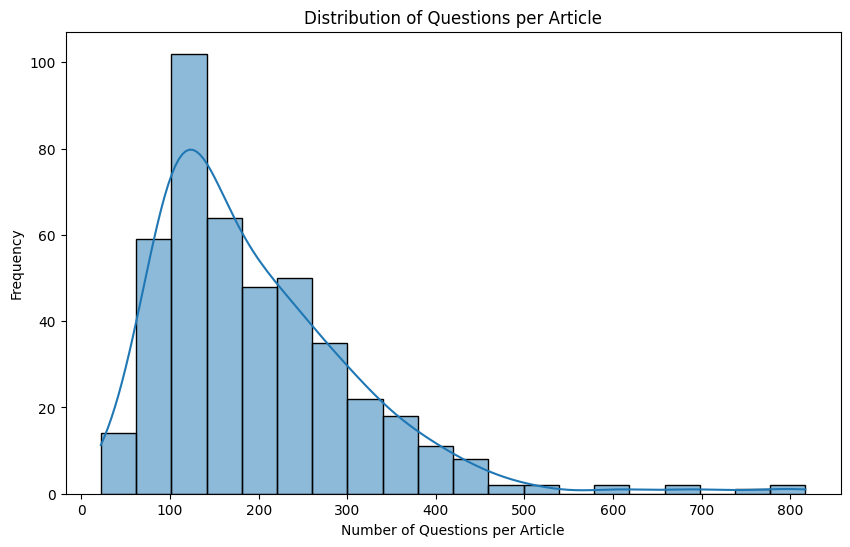

In [75]:
plot_question_distribution(df_train)

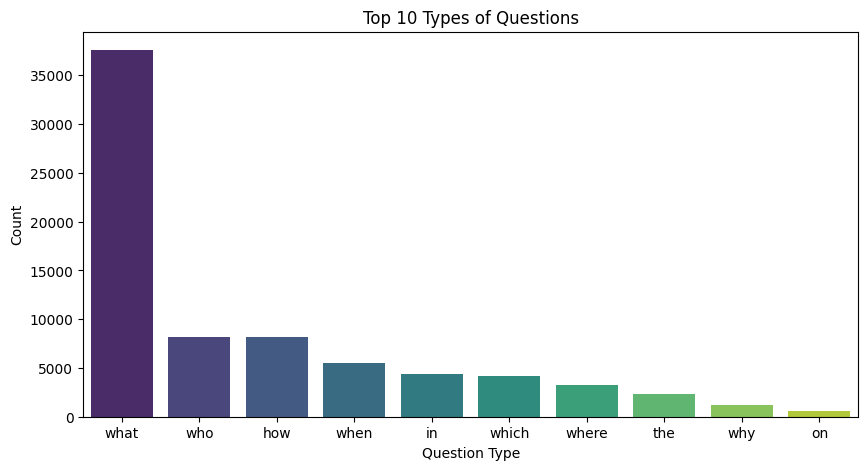

In [76]:
plot_top_question_types(df_train)

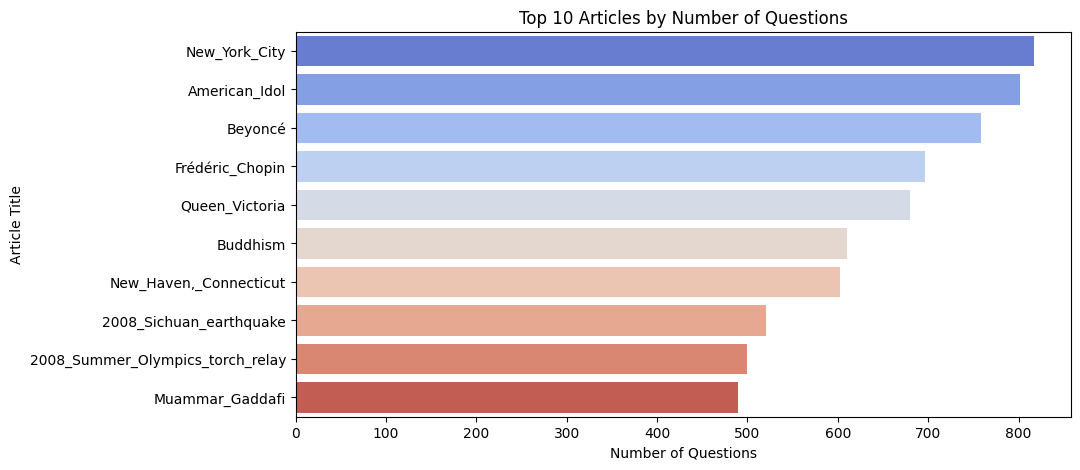

In [77]:
plot_top_articles(df_train)

### EDA on test data

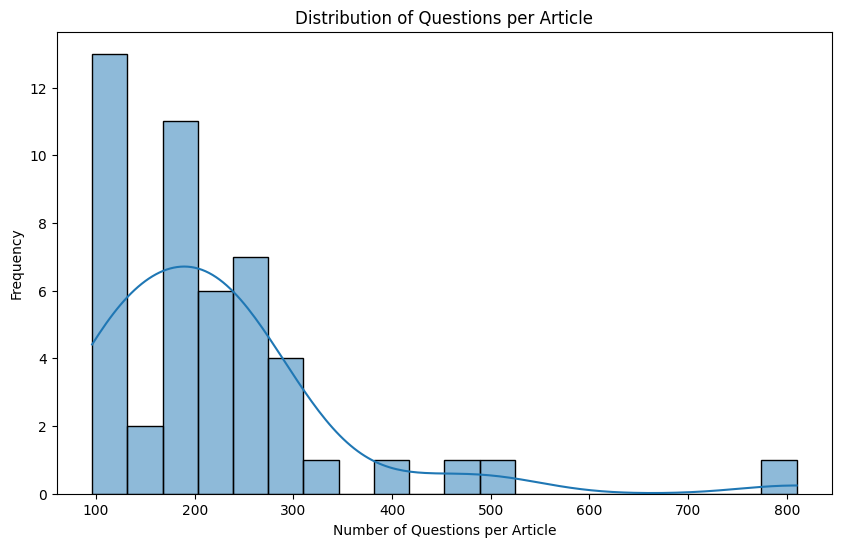

In [78]:
plot_question_distribution(df_test)

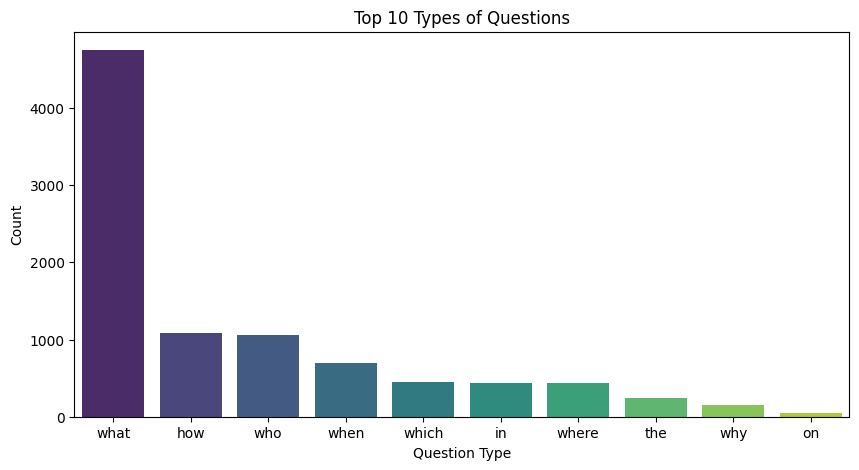

In [81]:
plot_top_question_types(df_test)

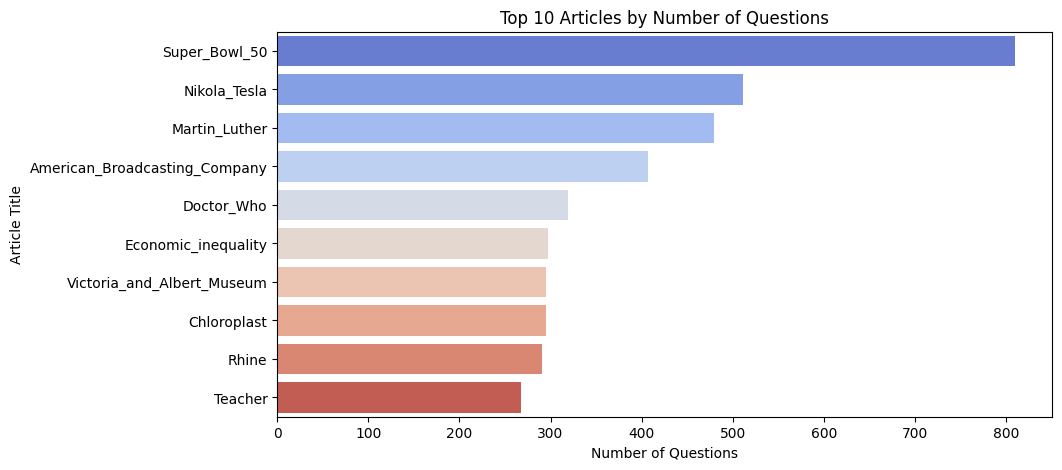

In [82]:
plot_top_articles(df_test)

- The distribution of both test and train data seems to be equally distributed which is a good thing